<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/14-Decision-Trees/00_My_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
print(df[df['species']=='Adelie']['species'].count())
print(df[df['species']=='Chinstrap']['species'].count())
print(df[df['species']=='Gentoo']['species'].count())

152
68
124


## Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
10/344*100

2.9069767441860463

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

## Visualization

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

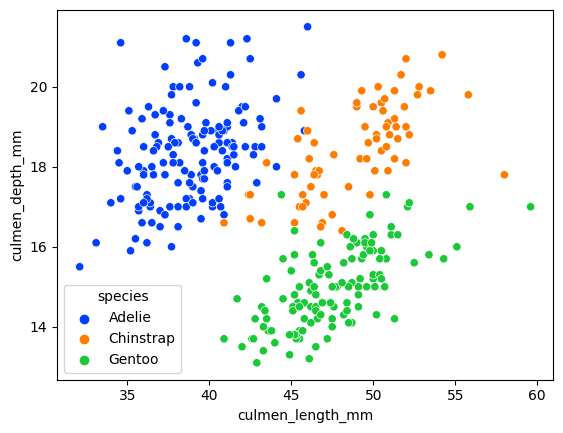

In [28]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', palette='bright')

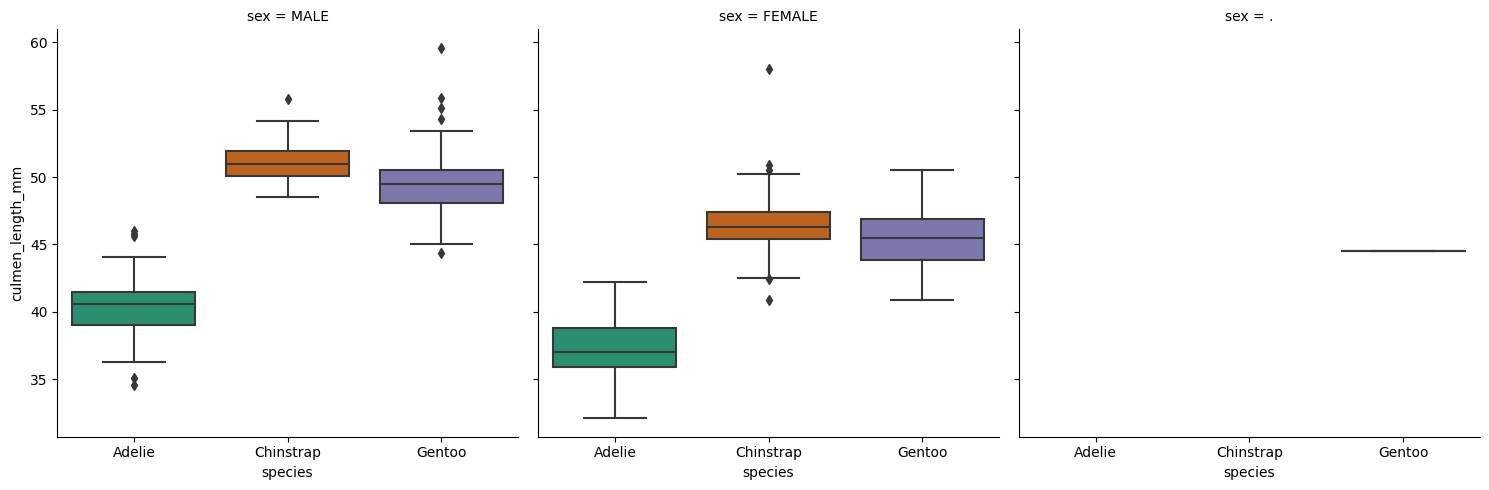

In [13]:
sns.catplot(data=df, x='species', y='culmen_length_mm', col='sex', kind='box', palette='Dark2' )

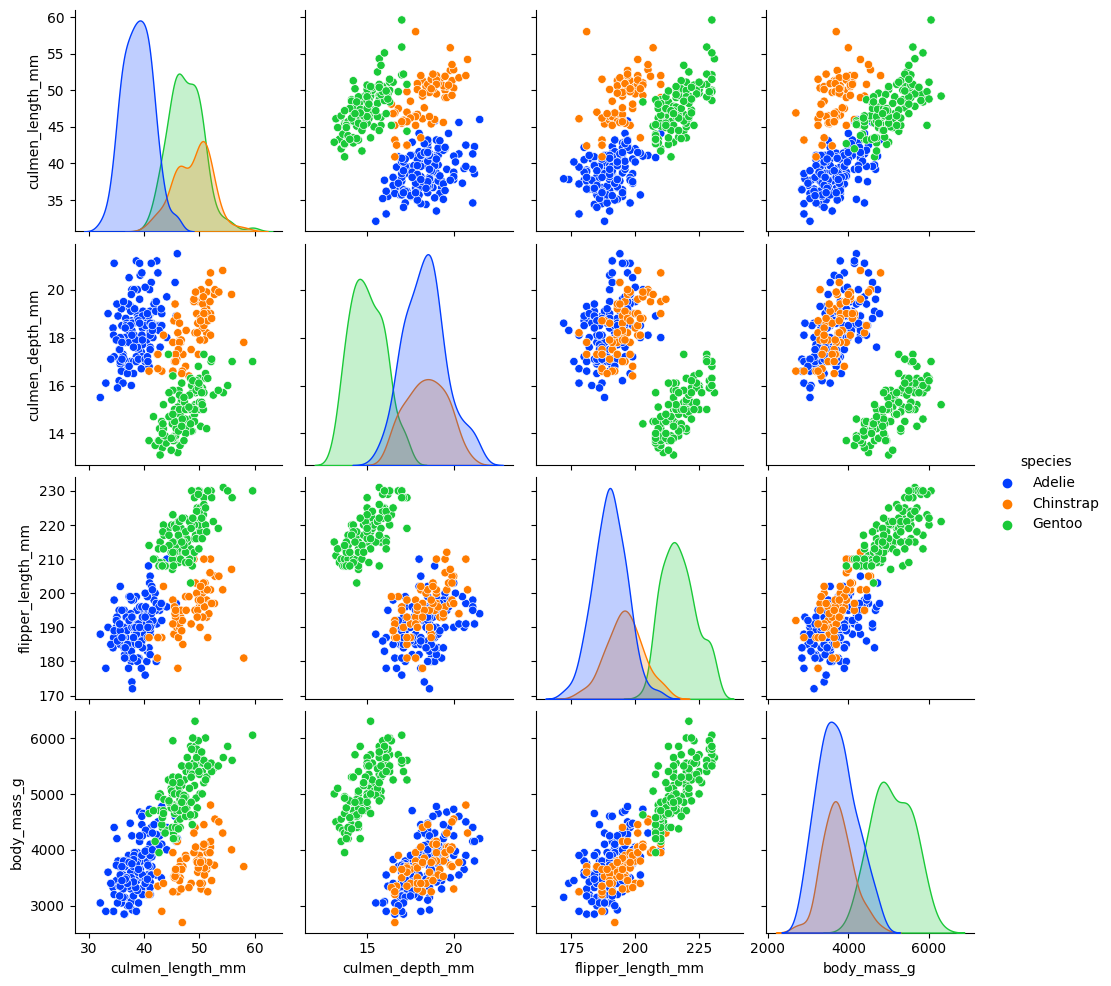

In [25]:
sns.pairplot(df, hue='species', palette='bright');

## Train | Test Split ,  Decision Tree Classifier and Evaluation

In [29]:
# DATA SPLIT
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

# TRAIN | TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# DECISION TREE CLASSIFIER WITH DEFAULT HYPERPARAMETERS
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
base_pred = model.predict(X_test)

# EVALUATION
confusion_matrix(y_test, base_pred)

array([[54,  0,  0],
       [ 2, 18,  0],
       [ 0,  0, 37]])

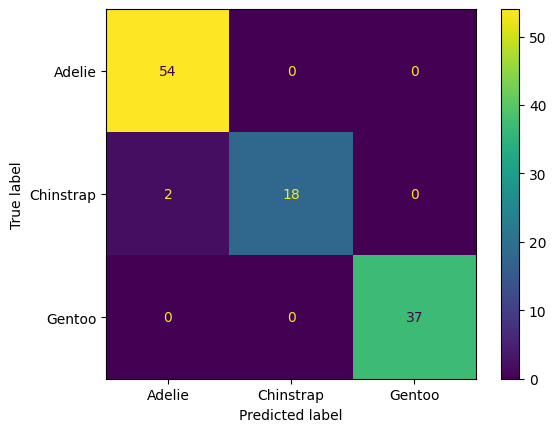

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, base_pred)

In [31]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        54
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       111
   macro avg       0.99      0.97      0.98       111
weighted avg       0.98      0.98      0.98       111



In [32]:
model.feature_importances_

array([0.3677062 , 0.09175992, 0.49926871, 0.        , 0.04126517,
       0.        , 0.        , 0.        ])

In [35]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.367706
culmen_depth_mm,0.091760
flipper_length_mm,0.499269
body_mass_g,0.000000
island_Dream,0.041265
island_Torgersen,0.000000
sex_FEMALE,0.000000
sex_MALE,0.000000


<Axes: xlabel='species', ylabel='body_mass_g'>

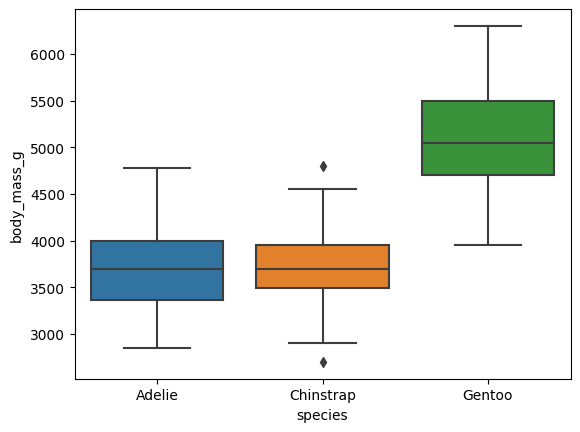

In [36]:
sns.boxplot(df, x='species', y='body_mass_g')

## Visualize the Tree

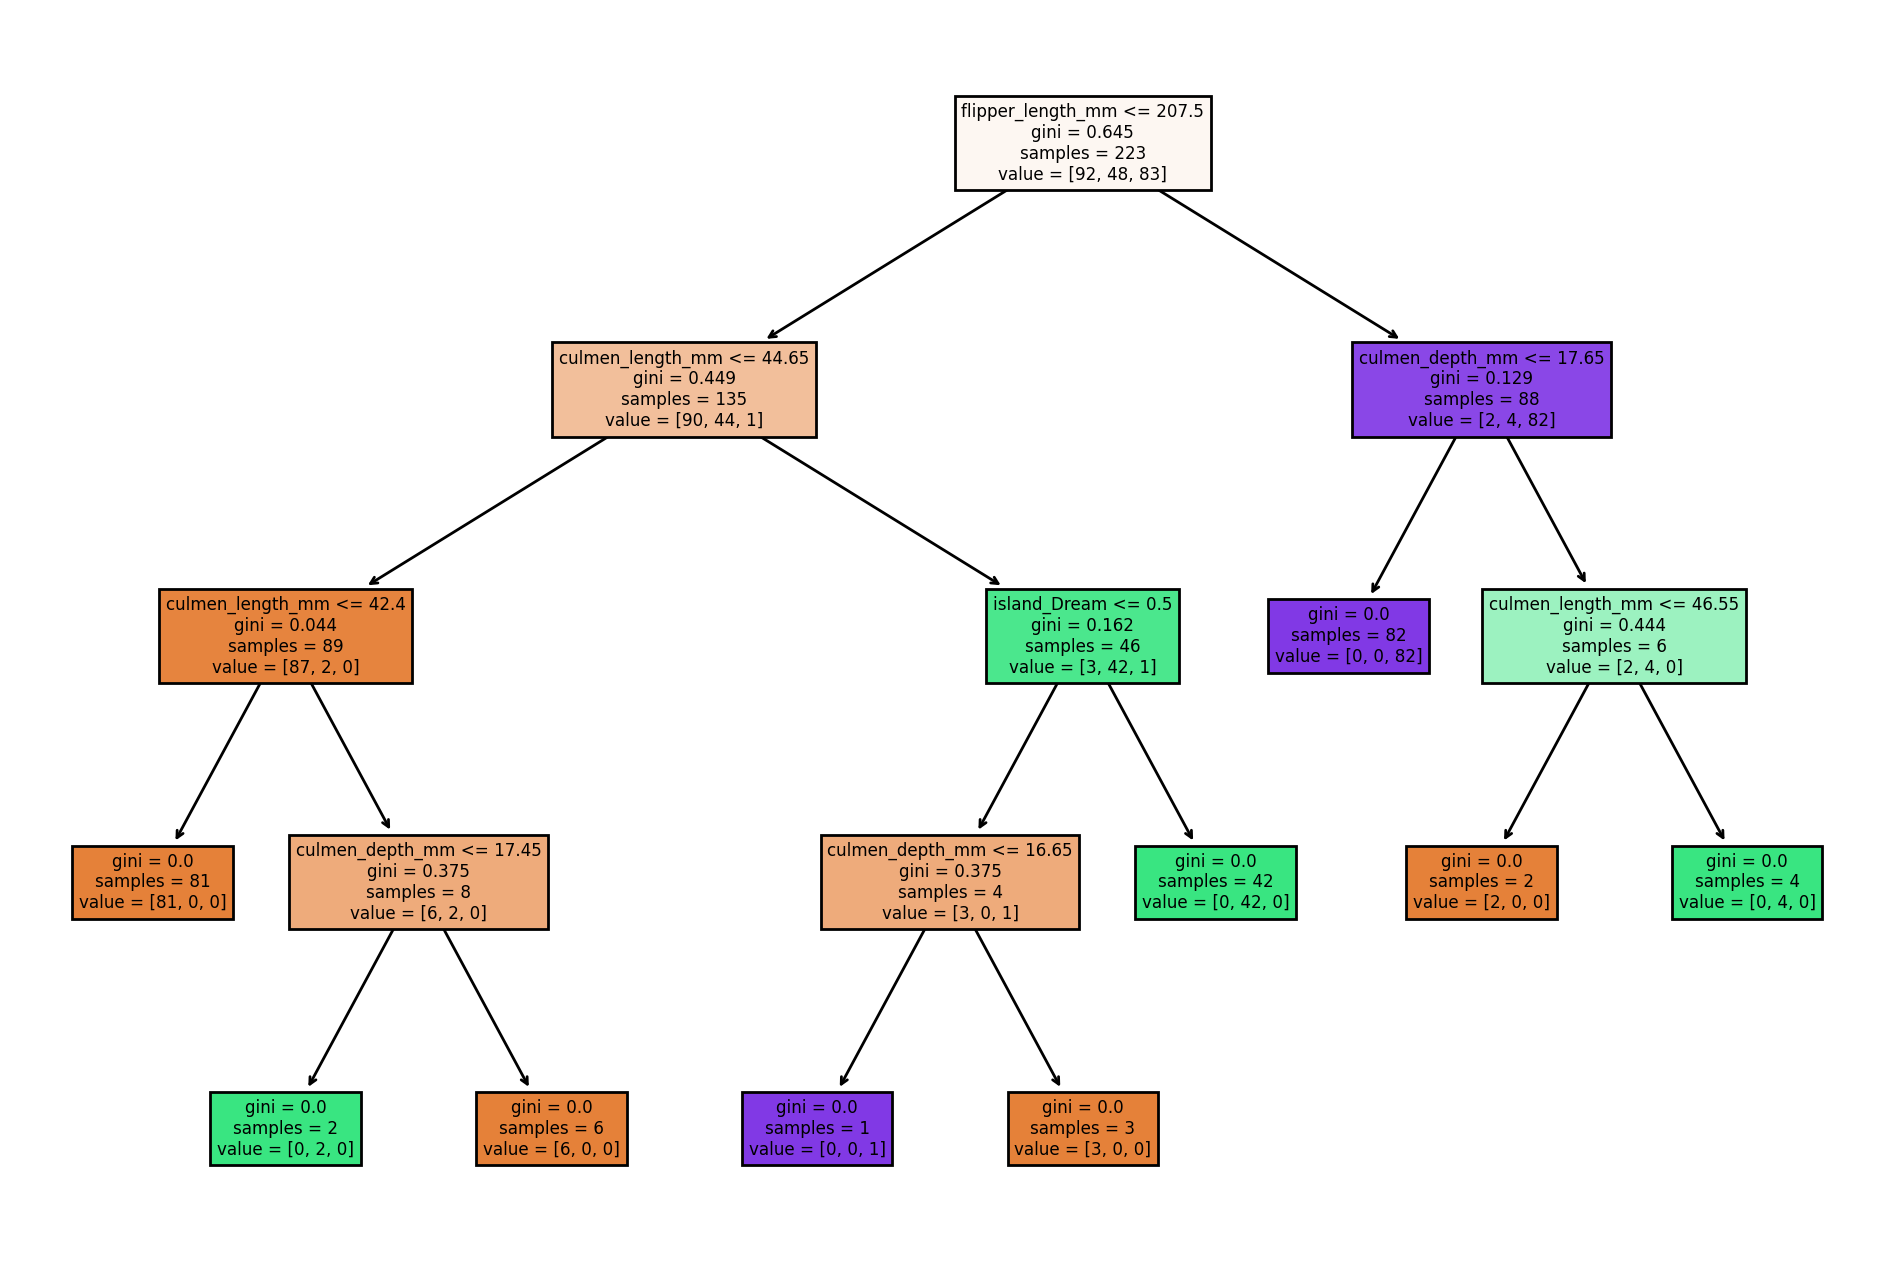

In [39]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, filled=True, feature_names=X.columns);

## Reporting Model Results

In [40]:
def report_model(model):
  model_preds = model.predict(X_test)
  print(classification_report(y_test, model_preds))
  print('\n')
  plt.figure(figsize=(12,8), dpi=150)
  plot_tree(model, filled=True, feature_names=X.columns)

## Criterion

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        54
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.97       111
   macro avg       0.98      0.96      0.97       111
weighted avg       0.97      0.97      0.97       111





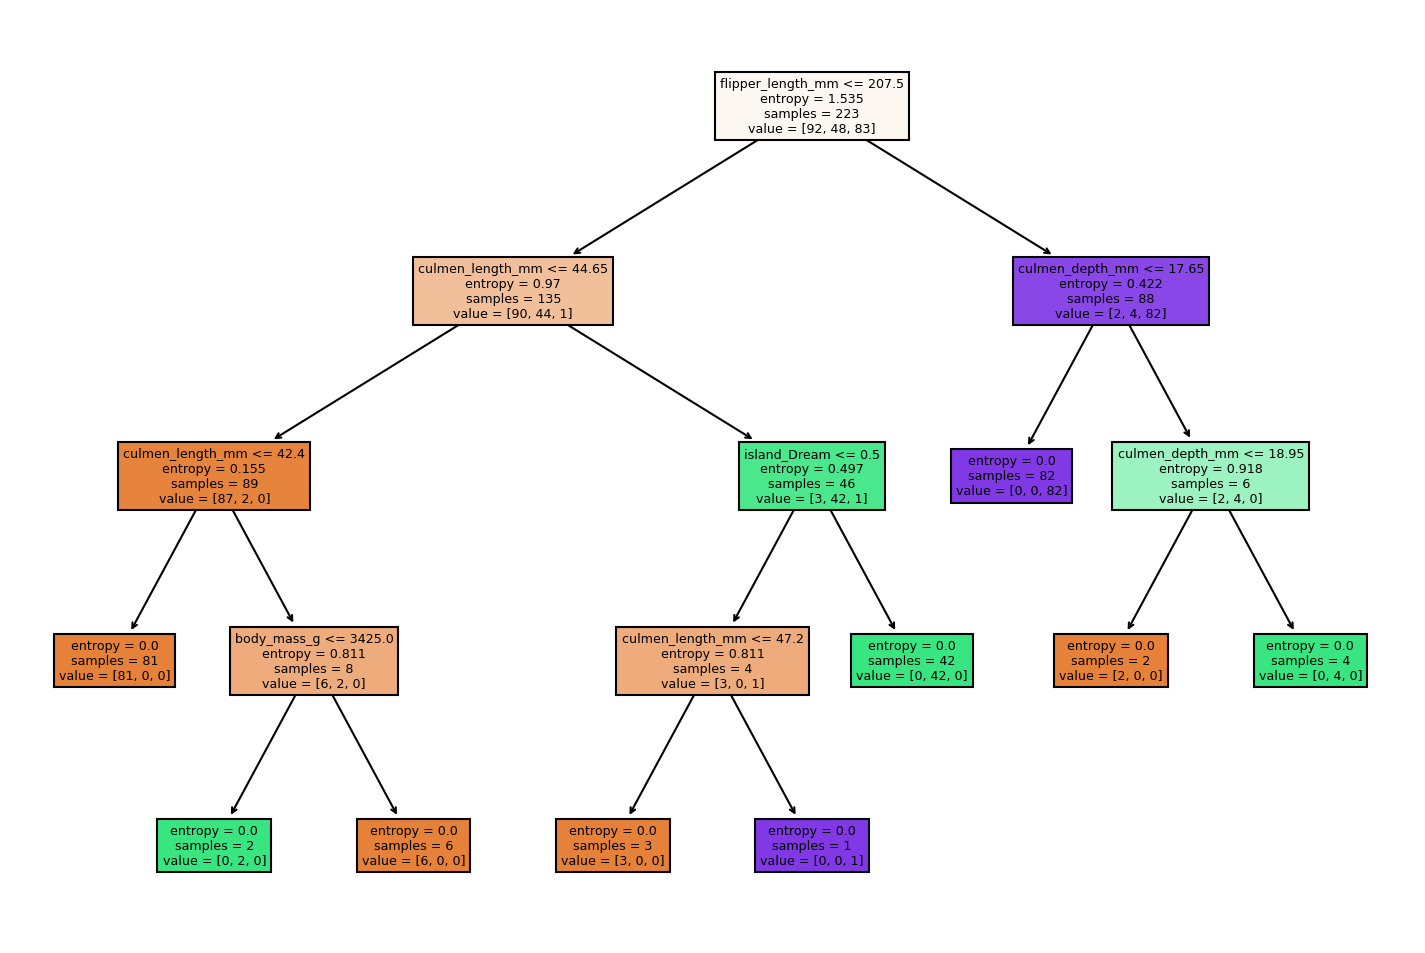

In [41]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)